iris データセットを用いて scikit-learn の様々な分類アルゴリズムを試してみた

https://qiita.com/ao_log/items/fe9bd42fd249c2a7ee7a

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

for i in range(iris.target_names.size):
  df.loc[df['target'] == i, 'target'] = iris.target_names[i]

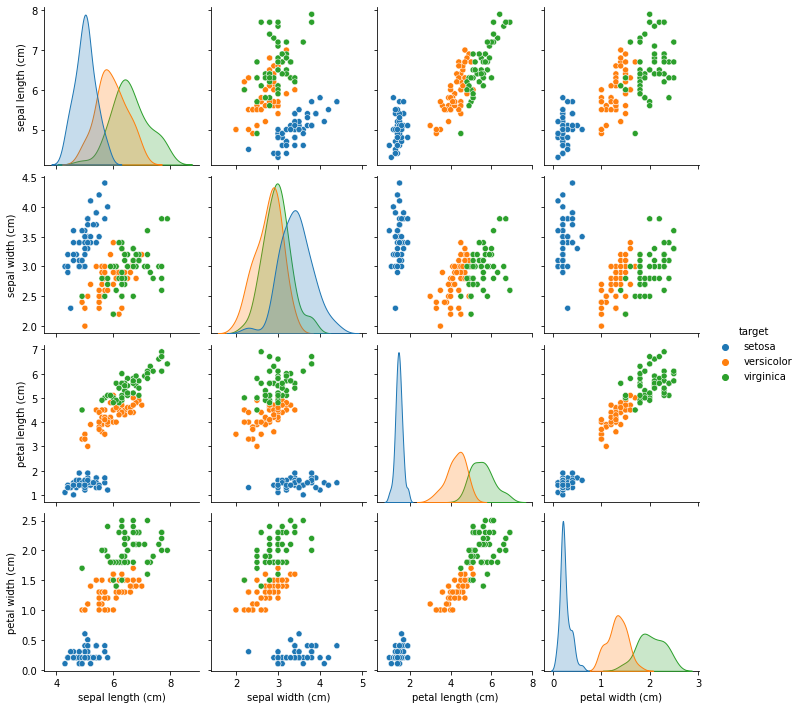

In [14]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [15]:
X = iris.data[:, [0, 2]]
y = iris.target

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# graph common settings
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def decision_boundary(clf, X, y, ax, title):
  clf.fit(X, y)
  
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].    
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  # Plot also the training points
  ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

  # label
  ax.set_title(title)
  #ax.set_xlabel('sepal length')
  #ax.set_ylabel('petal length')

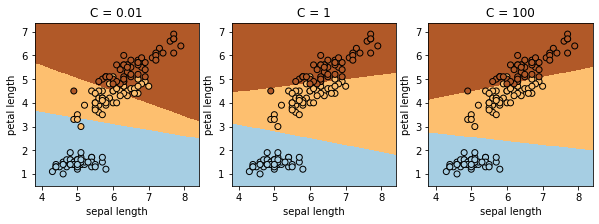

In [20]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
  title = 'C = {}'.format(C)
  clf = LogisticRegression(C=C)
  decision_boundary(clf, X, y, ax, title)

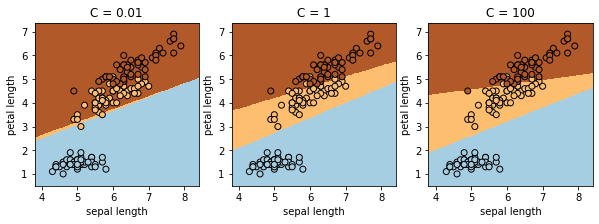

In [31]:
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
  title = 'C = {}'.format(C)
  clf = LinearSVC(C=C, max_iter=1e6)
  decision_boundary(clf, X, y, ax, title)

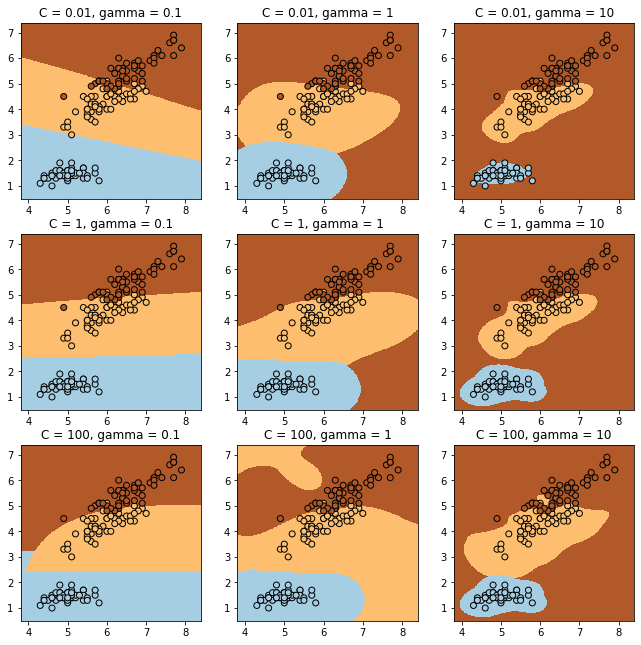

In [39]:
from sklearn.svm import SVC

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for ax_row, C in zip(axes, [0.01, 1, 100]):
  for ax, gamma in zip(ax_row, [0.1, 1, 10]):
    title = 'C = {}, gamma = {}'.format(C, gamma)
    clf = SVC(C=C, gamma=gamma, max_iter=1e6)
    decision_boundary(clf, X, y, ax, title)

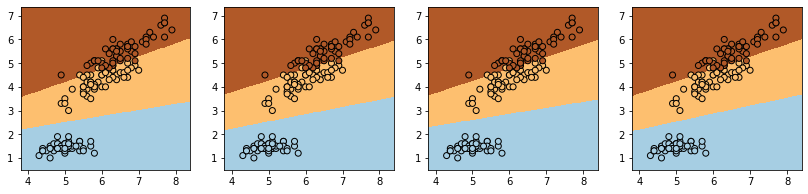

In [45]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(1, 4, figsize=(14, 3))

for ax, n in zip(axes, [15, 15, 15, 15]):
  title = ""
  clf = MLPClassifier(hidden_layer_sizes=[n, n], max_iter=int(1e3))
  decision_boundary(clf, X, y, ax, title)